# Fake news Detection

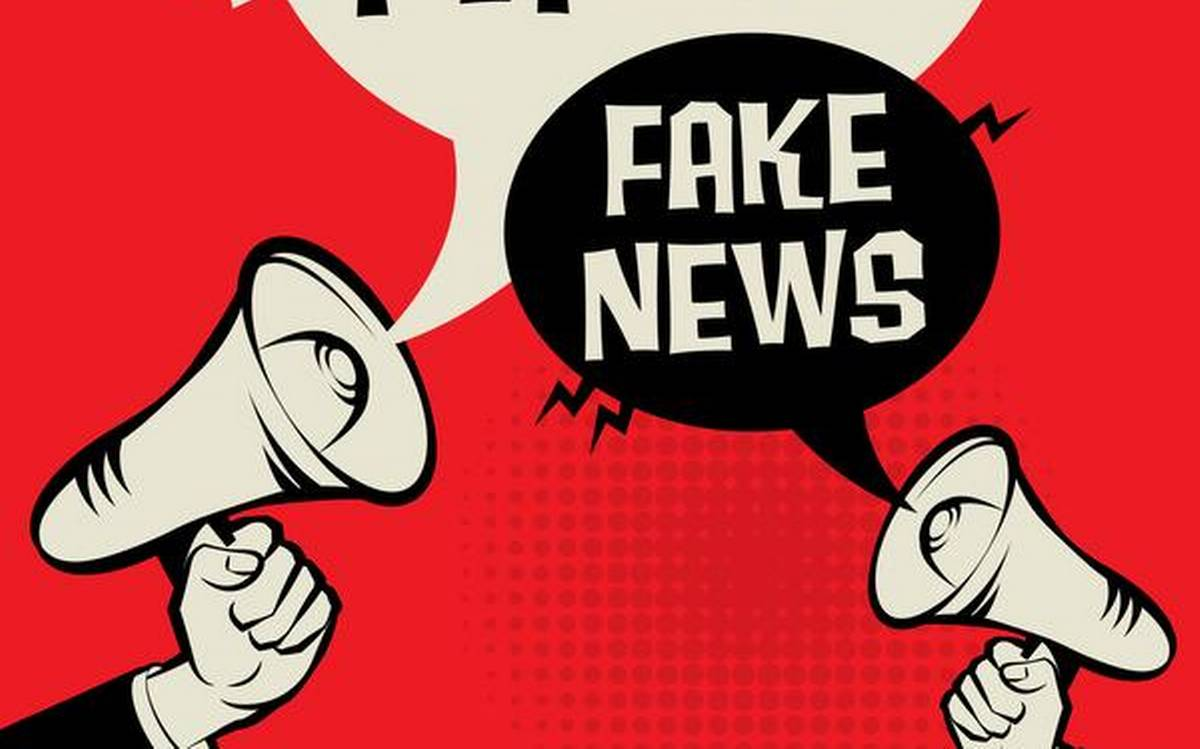

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
import klib
import warnings
warnings.filterwarnings("ignore")

## Read datasets

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [3]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Inserting a column called "class" for fake and real news dataset to categories fake and true news. 

In [5]:
df_fake["class"] = 0
df_true["class"] = 1

Removing last 10 rows from both the dataset, for manual testing  

In [6]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [7]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [8]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

Merging the manual testing dataframe in single dataset and save it in a csv file

In [9]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

In [10]:
df_fake_manual_testing.head()

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0


In [11]:
df_true_manual_testing.head()

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1


In [12]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

Merging the main fake and true dataframe

In [13]:
df_marge = pd.concat([df_fake, df_true], axis =0 )
df_marge.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [14]:
df_marge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [15]:
df=df_marge.drop(['title','subject','date'], axis=1)

In [16]:
df.isnull().sum()

text     0
class    0
dtype: int64

#### Randomly shuffling the dataframe 

In [17]:
df = df.sample(frac = 1)

In [18]:
df.head()

,text,class
11842,LONDON (Reuters) - Back from Brussels with a h...,1
5593,Donald Trump will likely go down in history (h...,0
17460,Don t you just love an entitled IRS lawyer who...,0
8934,NEW YORK (Reuters) - Dominican-born Adriano Es...,1
1002,WASHINGTON (Reuters) - The U.S. House of Repre...,1


In [19]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [20]:
df.columns

Index(['text', 'class'], dtype='object')

In [21]:
df.head()

,text,class
0,LONDON (Reuters) - Back from Brussels with a h...,1
1,Donald Trump will likely go down in history (h...,0
2,Don t you just love an entitled IRS lawyer who...,0
3,NEW YORK (Reuters) - Dominican-born Adriano Es...,1
4,WASHINGTON (Reuters) - The U.S. House of Repre...,1


In [22]:
# Remove punctuation, symbols etc.
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [23]:
df["text"] = df["text"].apply(wordopt)

## Visualization

GridSpec(6, 4)

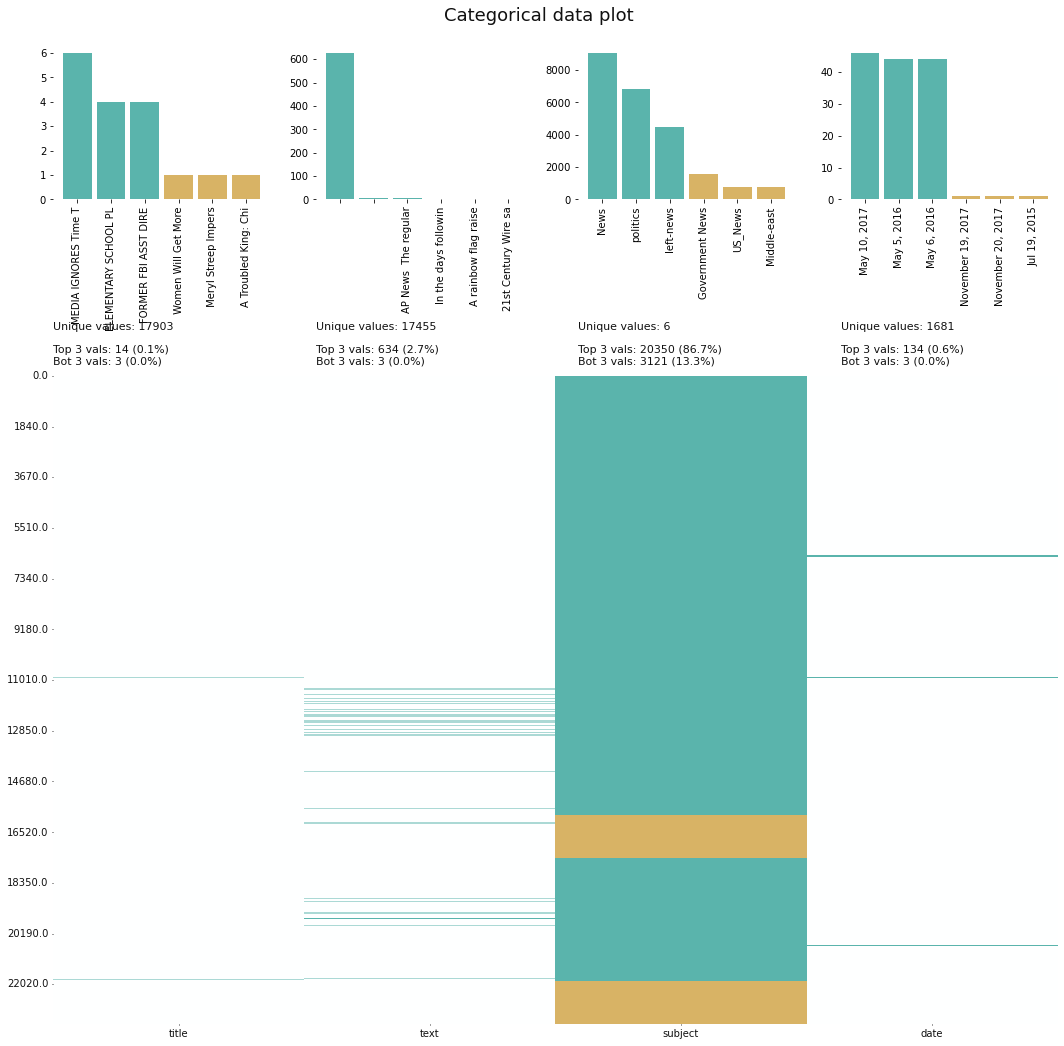

In [24]:
klib.cat_plot(df_fake)

GridSpec(6, 4)

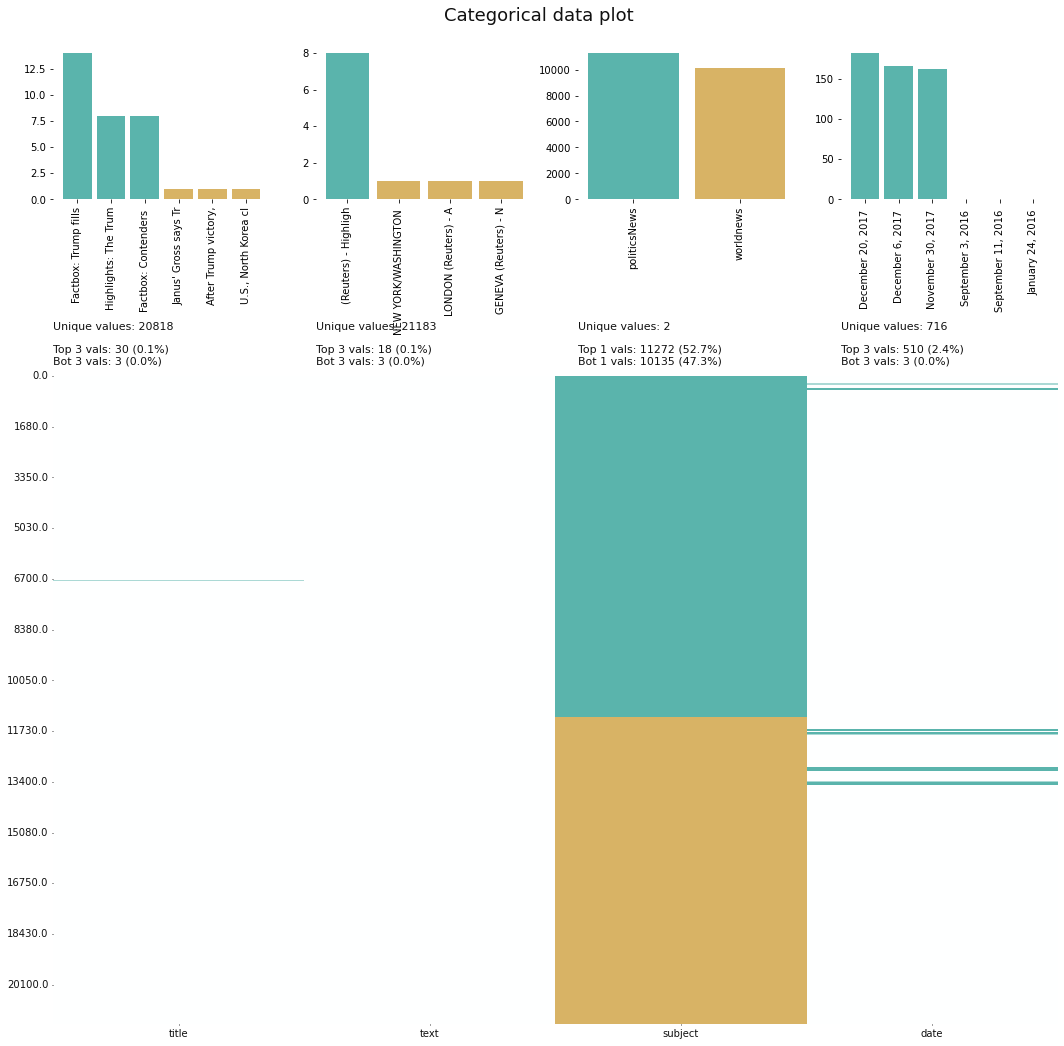

In [25]:
klib.cat_plot(df_true)

class
0    23471
1    21407
Name: text, dtype: int64


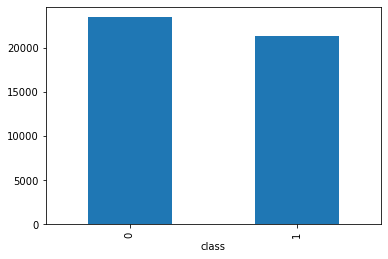

In [26]:
# How many fake and real articles?
print(df.groupby(['class'])['text'].count())
df.groupby(['class'])['text'].count().plot(kind="bar")
plt.show()

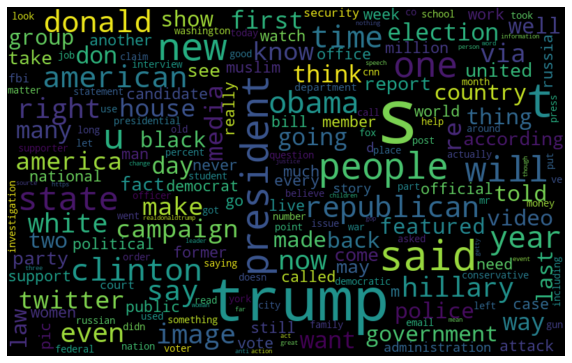

In [27]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = df[df["class"] == 0]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

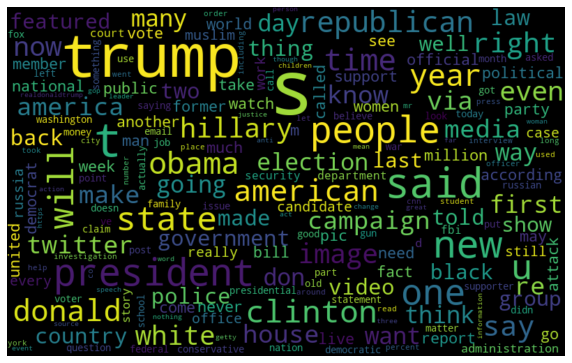

In [28]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = df[df["class"] == 1]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Modeling

In [29]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Defining dependent and independent variable as x and y

In [30]:
x = df["text"]
y = df["class"]

#### Splitting the dataset into training set and testing set. 

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

#### Convert text to vectors

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### 1. Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [36]:
pred_lr=LR.predict(xv_test)

In [37]:
LR.score(xv_test, y_test)

0.9869875222816399

In [38]:
score_lr=LR.score(xv_test, y_test)*100

Confusion matrix, without normalization


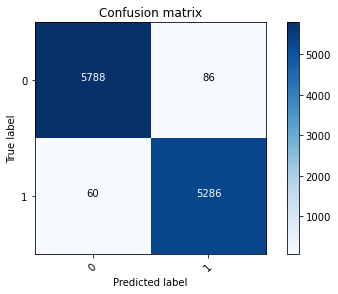

In [39]:
cm = metrics.confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(cm, classes=[0, 1])

In [40]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5874
           1       0.98      0.99      0.99      5346

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



### 2. Decision Tree Classification

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [43]:
pred_dt = DT.predict(xv_test)

In [44]:
DT.score(xv_test, y_test)

0.9962566844919786

In [45]:
score_dt=DT.score(xv_test, y_test)*100

Confusion matrix, without normalization


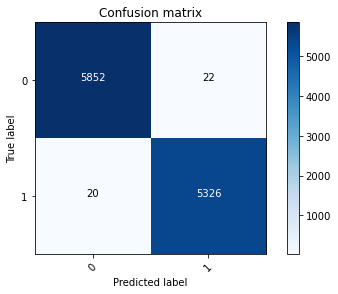

In [46]:
cm = metrics.confusion_matrix(y_test, pred_dt)
plot_confusion_matrix(cm, classes=[0, 1])

In [47]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5874
           1       1.00      1.00      1.00      5346

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



### 3. Gradient Boosting Classifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [50]:
pred_gbc = GBC.predict(xv_test)

In [51]:
GBC.score(xv_test, y_test)

0.9964349376114082

In [52]:
score_gbc=GBC.score(xv_test, y_test)*100

Confusion matrix, without normalization


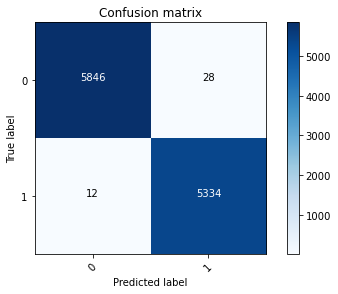

In [53]:
cm = metrics.confusion_matrix(y_test, pred_gbc)
plot_confusion_matrix(cm, classes=[0, 1])

In [54]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5874
           1       0.99      1.00      1.00      5346

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



### 4. Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [57]:
pred_rfc = RFC.predict(xv_test)

In [58]:
RFC.score(xv_test, y_test)

0.9910873440285205

In [59]:
score_rfc=RFC.score(xv_test, y_test)*100

Confusion matrix, without normalization


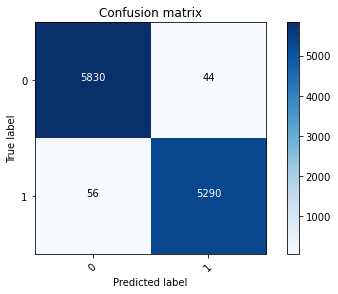

In [60]:
cm = metrics.confusion_matrix(y_test, pred_rfc)
plot_confusion_matrix(cm, classes=[0, 1])

In [61]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5874
           1       0.99      0.99      0.99      5346

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



# Model Testing With Manual Entry

### News

In [62]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [63]:
news = str(input())
manual_testing(news)

Russia Ukraine War Crisis Live: A Russian mortar attack on Ukrainian town of Makariv in the Kyiv region killed seven people and hospitalised five on Friday, local police said in a statement on Saturday. “As a result of enemy shelling of Makariv, seven civilians were killed,” the statement said. Meanwhile, Russia’s defence ministry reported the use of hypersonic Kinzhal missiles in Ukraine, according to an IFX report. Additionally, it said that the radio reconnaissance centres of Ukraine’s military has been destroyed near Ukraine’s Odessa.  On Friday, Vladimir Putin appeared at a huge flag-waving rally at a packed Moscow stadium and lavished praise on his troops fighting in Ukraine, three weeks into the invasion. Meanwhile, Ukrainian President Volodymyr Zelenskyy called for comprehensive peace talks with Moscow, saying Russia would otherwise need generations to recover from losses suffered during the war.


LR Prediction: Not A Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake N

In [64]:
scores = [score_lr,score_dt,score_gbc,score_rfc]
algorithms = ["Logistic Regression","DecisionTreeClassifier","Gradient Boosting Classifier","RandomForestClassifier",]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 98.69875222816398 %
The accuracy score achieved using DecisionTreeClassifier is: 99.62566844919786 %
The accuracy score achieved using Gradient Boosting Classifier is: 99.64349376114082 %
The accuracy score achieved using RandomForestClassifier is: 99.10873440285205 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

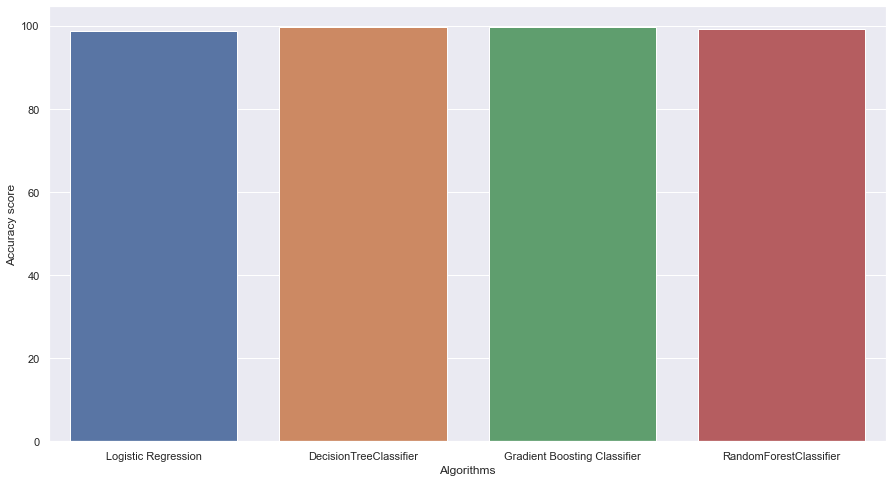

In [65]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)